<a href="https://colab.research.google.com/github/heugyu/notebook/blob/master/DNQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DNQ(deep-q-network)
- 강화학습(reinfocement learning) - 자기 주도적 학습법 
    - 상태(state)
    - 에이전트(agent)
    - 행동(action)
    - 보상(reward)
    - 기억하기(memorize)
    - 보기(replay)

In [5]:
!apt-get update

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done


In [0]:
# Rendering Dependanceies
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg  > /dev/null 2>&1

In [7]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
from gym import logger as gymlogger
from gym.wrappers import Monitor

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [0]:
# 카트폴
import gym
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import matplotlib.pyplot as plt


In [0]:
# 하이퍼 파라미터
EPISODES = 50   # 에피소드 반복 횟수
EPS_START = 0.9 # 학습 시작 시 에이전트가 무작위로 행동할 확률
EPS_END = 0.05  # 학습 막바지에 에이전트가 무작위로 행동할 확률
EPS_DECAY = 200 # 학습 진행 시 에이전트가 무작위로 행동할 확률을 감소시키는 값
GAMMA = 0.8     # 할인계수
LR = 0.001      # 학습률
BATCH_SIZE = 64 # 배치 크기 

In [0]:
# DQN Agent
class DQNAgent:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(4, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        )
        self.optimizer = optim.Adam(self.model.parameters(), LR)
        self.steps_done = 0
        self.memory = deque(maxlen=10000)
    
    def memorize(self, state, action, reward, next_state):
        self.memory.append((state,
                            action,
                            torch.FloatTensor([reward]),
                            torch.FloatTensor([next_state])))
    
    def act(self, state):
        eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * self.steps_done / EPS_DECAY)
        self.steps_done += 1
        if random.random() > eps_threshold:
            return self.model(state).data.max(1)[1].view(1,1)
        else:
            return torch.LongTensor([[random.randrange(2)]])
    
    def learn(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states = zip(*batch)
        states = torch.cat(states)
        actions = torch.cat(actions)
        rewards = torch.cat(rewards)
        next_states = torch.cat(next_states)

        current_q = self.model(states).gather(1, actions)
        max_next_q = self.model(next_states).detach().max(1)[0]
        expected_q = rewards + (GAMMA * max_next_q )
        
        loss = F.mse_loss(current_q.squeeze(), expected_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


에피소드 : 1 점수 : 36
에피소드 : 2 점수 : 28
에피소드 : 3 점수 : 13
에피소드 : 4 점수 : 27
에피소드 : 5 점수 : 17
에피소드 : 6 점수 : 16
에피소드 : 7 점수 : 13
에피소드 : 8 점수 : 11
에피소드 : 9 점수 : 13
에피소드 : 10 점수 : 13
에피소드 : 11 점수 : 22
에피소드 : 12 점수 : 11
에피소드 : 13 점수 : 20
에피소드 : 14 점수 : 12
에피소드 : 15 점수 : 11
에피소드 : 16 점수 : 18
에피소드 : 17 점수 : 13
에피소드 : 18 점수 : 9
에피소드 : 19 점수 : 15
에피소드 : 20 점수 : 10
에피소드 : 21 점수 : 8
에피소드 : 22 점수 : 16
에피소드 : 23 점수 : 20
에피소드 : 24 점수 : 31
에피소드 : 25 점수 : 46
에피소드 : 26 점수 : 111
에피소드 : 27 점수 : 55
에피소드 : 28 점수 : 188
에피소드 : 29 점수 : 129
에피소드 : 30 점수 : 133
에피소드 : 31 점수 : 127
에피소드 : 32 점수 : 112
에피소드 : 33 점수 : 145
에피소드 : 34 점수 : 129
에피소드 : 35 점수 : 129
에피소드 : 36 점수 : 195
에피소드 : 37 점수 : 108
에피소드 : 38 점수 : 128
에피소드 : 39 점수 : 124
에피소드 : 40 점수 : 200
에피소드 : 41 점수 : 200
에피소드 : 42 점수 : 167
에피소드 : 43 점수 : 139
에피소드 : 44 점수 : 200
에피소드 : 45 점수 : 159
에피소드 : 46 점수 : 189
에피소드 : 47 점수 : 155
에피소드 : 48 점수 : 183
에피소드 : 49 점수 : 187
에피소드 : 50 점수 : 199


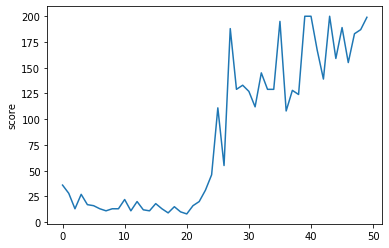

In [17]:
# 학습 준비하기
agent = DQNAgent()
env = wrap_env(gym.make('CartPole-v0'))
score_history = []

for e in range(1, EPISODES+1):
    state = env.reset()
    steps = 0

    while True:
        env.render()
        state = torch.FloatTensor([state])
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action.item())

        # 게임이 끝났을 경우 마이너스 보상주기
        if done:
            reward = -1

        agent.memorize(state, action, reward, next_state)
        agent.learn()

        state = next_state
        steps += 1

        if done:
            print(f'에피소드 : {e} 점수 : {steps}')
            score_history.append(steps)
            break

plt.plot(score_history)
plt.ylabel('score')
plt.show()